# SETUP

Set randome seed in tensorflow to reproduce the results with tensorflow.keras. Codes are adopated from Brownlee (2017) https://machinelearningmastery.com/reproducible-results-neural-networks-keras/

In [1]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

Import base packages into the namespace for this program

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

Import tensorflow and tensorflow.keras to building neural network model

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

Using TensorFlow backend.


# MNIST DATASET

Download MNIST dataset

In [4]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Visualize the first image in training set. Codes adopted from Chollet (2017) "Train your first neural network: basic classification" at https://www.tensorflow.org/tutorials/keras/basic_classification

In [5]:
print(X_train.shape)

(60000, 28, 28)


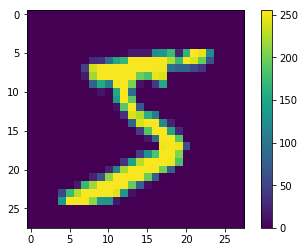

In [6]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

As shown in above image, the pixel values fall in the range of 0 to 255. We will rescale the data to a range of 0 to 1 before feeding to the neural network model on both the train and test set separately. 

In [7]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format.

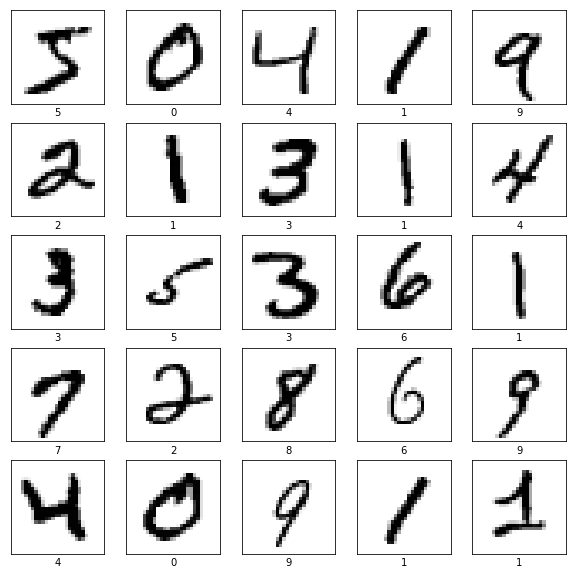

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_scaled[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

The images above confirm that the data set is in correct format. Now we can build and train the network.

# NEURAL NETWORK TEST WITHIN A BENCHMARK EXPERIMENT

A 2x2 factorial design is utilized for this experiment. The two (2) experimental factors selected for this study are: (1) nodes-per-layer: 2, 24, 64; (2) activation of hidden layer: sigmoid, relu, and tanh. All the other parameters are set as constant at select values or default values. For each combination, we will run 10 epochs with a batch size of 512. accuracy and validation accuracy were recorded for each combination for comparison analysis.

Codes adoppted from Chollet (2017) "Train your first neural network: basic classification" at https://www.tensorflow.org/tutorials/keras/basic_classification and Miller (2017) 6_mnist_from_scratch_scikit-learn-ann-v001.

Define the function to build neural network.

In [9]:
def build_model(node, activation):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(node, activation=activation))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Define the name of each combination test.

In [10]:
names = ['2-nodes-with-sigmoid',
         '2-nodes-with-relu',
         '2-nodes-with-tanh',
         '24-nodes-with-sigmoid',
         '24-nodes-with-relu',
         '24-nodes-with-tanh',
         '64-nodes-with-sigmoid',
         '64-nodes-with-relu',
         '64-nodes-with-tanh']

Specify the values for the two experimental factors.

In [11]:
nodes = [2, 2, 2, 24, 24, 24, 64, 64, 64]
activations = ['sigmoid', 'relu', 'tanh', 'sigmoid', 'relu', 'tanh', 'sigmoid', 'relu', 'tanh']

Setup empty array to store the test results later.

In [12]:
index_for_method = 0 
training_performance_results = []
validation_performance_results = []

Split the train set to be partial train set and validation set. 

In [13]:
partial_x_train=X_train_scaled[:50000]
partial_y_train=y_train[:50000]
x_val=X_train_scaled[50000:]
y_val=y_train[50000:]

Build and evaluate all nine (9) combinations. 

In [14]:
for name, node, activation in zip(names, nodes, activations):
    print('\n------------------------------------')
    print('\nProcessing Training Method:', name)
    model = build_model(node, activation)
    history = model.fit(partial_x_train, 
              partial_y_train, 
              epochs=100,
             batch_size = 512,
             validation_data=(x_val, y_val))
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']
    training_performance_results.append(train_acc)
    validation_performance_results.append(val_acc)
                
    index_for_method += 1


------------------------------------

Processing Training Method: 2-nodes-with-sigmoid
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 1s 23us/step - loss: 2.2337 - acc: 0.1700 - val_loss: 2.1522 - val_acc: 0.1848
Epoch 2/100
50000/50000 [==============================] - 1s 20us/step - loss: 2.1201 - acc: 0.1997 - val_loss: 2.0675 - val_acc: 0.2561
Epoch 3/100
50000/50000 [==============================] - 1s 19us/step - loss: 2.0471 - acc: 0.2998 - val_loss: 2.0003 - val_acc: 0.3511
Epoch 4/100
50000/50000 [==============================] - 1s 26us/step - loss: 1.9861 - acc: 0.3531 - val_loss: 1.9420 - val_acc: 0.3826
Epoch 5/100
50000/50000 [==============================] - 1s 27us/step - loss: 1.9325 - acc: 0.3755 - val_loss: 1.8903 - val_acc: 0.3963
Epoch 6/100
50000/50000 [==============================] - 1s 18us/step - loss: 1.8844 - acc: 0.3827 - val_loss: 1.8434 - val_acc: 0.3950
Epoch 7/100
50000/50000 [=========

50000/50000 [==============================] - 1s 14us/step - loss: 1.3678 - acc: 0.5033 - val_loss: 1.3465 - val_acc: 0.5115
Epoch 60/100
50000/50000 [==============================] - 1s 14us/step - loss: 1.3634 - acc: 0.5054 - val_loss: 1.3424 - val_acc: 0.5143
Epoch 61/100
50000/50000 [==============================] - 1s 15us/step - loss: 1.3586 - acc: 0.5077 - val_loss: 1.3378 - val_acc: 0.5145
Epoch 62/100
50000/50000 [==============================] - 1s 14us/step - loss: 1.3539 - acc: 0.5079 - val_loss: 1.3342 - val_acc: 0.5161
Epoch 63/100
50000/50000 [==============================] - 1s 14us/step - loss: 1.3491 - acc: 0.5112 - val_loss: 1.3296 - val_acc: 0.5182
Epoch 64/100
50000/50000 [==============================] - 1s 17us/step - loss: 1.3441 - acc: 0.5115 - val_loss: 1.3255 - val_acc: 0.5186
Epoch 65/100
50000/50000 [==============================] - 1s 17us/step - loss: 1.3394 - acc: 0.5134 - val_loss: 1.3200 - val_acc: 0.5193
Epoch 66/100
50000/50000 [==============

Epoch 76/100
50000/50000 [==============================] - 1s 15us/step - loss: 1.0041 - acc: 0.6836 - val_loss: 0.9678 - val_acc: 0.6996
Epoch 77/100
50000/50000 [==============================] - 1s 14us/step - loss: 1.0012 - acc: 0.6851 - val_loss: 0.9647 - val_acc: 0.7009
Epoch 78/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.9980 - acc: 0.6850 - val_loss: 0.9616 - val_acc: 0.6982
Epoch 79/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.9959 - acc: 0.6858 - val_loss: 0.9587 - val_acc: 0.7029
Epoch 80/100
50000/50000 [==============================] - 1s 14us/step - loss: 0.9931 - acc: 0.6876 - val_loss: 0.9560 - val_acc: 0.7034
Epoch 81/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.9906 - acc: 0.6888 - val_loss: 0.9549 - val_acc: 0.7045
Epoch 82/100
50000/50000 [==============================] - 1s 14us/step - loss: 0.9886 - acc: 0.6879 - val_loss: 0.9556 - val_acc: 0.7038
Epoch 83/100
50000/50000 [=

50000/50000 [==============================] - 1s 15us/step - loss: 1.2397 - acc: 0.4813 - val_loss: 1.2367 - val_acc: 0.4696
Epoch 35/100
50000/50000 [==============================] - 1s 15us/step - loss: 1.2366 - acc: 0.4816 - val_loss: 1.2315 - val_acc: 0.4755
Epoch 36/100
50000/50000 [==============================] - 1s 15us/step - loss: 1.2330 - acc: 0.4872 - val_loss: 1.2280 - val_acc: 0.4780
Epoch 37/100
50000/50000 [==============================] - 1s 14us/step - loss: 1.2298 - acc: 0.4889 - val_loss: 1.2270 - val_acc: 0.4850
Epoch 38/100
50000/50000 [==============================] - 1s 15us/step - loss: 1.2261 - acc: 0.4926 - val_loss: 1.2220 - val_acc: 0.4842
Epoch 39/100
50000/50000 [==============================] - 1s 15us/step - loss: 1.2233 - acc: 0.4962 - val_loss: 1.2189 - val_acc: 0.4894
Epoch 40/100
50000/50000 [==============================] - 1s 15us/step - loss: 1.2198 - acc: 0.5000 - val_loss: 1.2171 - val_acc: 0.4918
Epoch 41/100
50000/50000 [==============

Epoch 93/100
50000/50000 [==============================] - 1s 16us/step - loss: 1.0549 - acc: 0.6609 - val_loss: 1.0501 - val_acc: 0.6656
Epoch 94/100
50000/50000 [==============================] - 1s 15us/step - loss: 1.0510 - acc: 0.6619 - val_loss: 1.0485 - val_acc: 0.6682
Epoch 95/100
50000/50000 [==============================] - 1s 17us/step - loss: 1.0480 - acc: 0.6644 - val_loss: 1.0438 - val_acc: 0.6701
Epoch 96/100
50000/50000 [==============================] - 1s 16us/step - loss: 1.0439 - acc: 0.6650 - val_loss: 1.0396 - val_acc: 0.6696
Epoch 97/100
50000/50000 [==============================] - 1s 15us/step - loss: 1.0413 - acc: 0.6681 - val_loss: 1.0363 - val_acc: 0.6767
Epoch 98/100
50000/50000 [==============================] - 1s 14us/step - loss: 1.0375 - acc: 0.6696 - val_loss: 1.0337 - val_acc: 0.6786
Epoch 99/100
50000/50000 [==============================] - 1s 14us/step - loss: 1.0345 - acc: 0.6709 - val_loss: 1.0283 - val_acc: 0.6782
Epoch 100/100
50000/50000 [

Epoch 51/100
50000/50000 [==============================] - 1s 17us/step - loss: 0.1367 - acc: 0.9611 - val_loss: 0.1673 - val_acc: 0.9532
Epoch 52/100
50000/50000 [==============================] - 1s 18us/step - loss: 0.1353 - acc: 0.9620 - val_loss: 0.1678 - val_acc: 0.9527
Epoch 53/100
50000/50000 [==============================] - 1s 16us/step - loss: 0.1340 - acc: 0.9620 - val_loss: 0.1661 - val_acc: 0.9530
Epoch 54/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.1321 - acc: 0.9628 - val_loss: 0.1655 - val_acc: 0.9538
Epoch 55/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.1309 - acc: 0.9634 - val_loss: 0.1651 - val_acc: 0.9539
Epoch 56/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.1295 - acc: 0.9637 - val_loss: 0.1659 - val_acc: 0.9533
Epoch 57/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.1282 - acc: 0.9641 - val_loss: 0.1647 - val_acc: 0.9537
Epoch 58/100
50000/50000 [=

50000/50000 [==============================] - 1s 16us/step - loss: 0.2149 - acc: 0.9387 - val_loss: 0.2046 - val_acc: 0.9412
Epoch 10/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.2043 - acc: 0.9421 - val_loss: 0.1995 - val_acc: 0.9423
Epoch 11/100
50000/50000 [==============================] - 1s 16us/step - loss: 0.1960 - acc: 0.9449 - val_loss: 0.1937 - val_acc: 0.9438
Epoch 12/100
50000/50000 [==============================] - 1s 18us/step - loss: 0.1885 - acc: 0.9465 - val_loss: 0.1882 - val_acc: 0.9456
Epoch 13/100
50000/50000 [==============================] - 1s 16us/step - loss: 0.1812 - acc: 0.9489 - val_loss: 0.1845 - val_acc: 0.9467
Epoch 14/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.1746 - acc: 0.9508 - val_loss: 0.1807 - val_acc: 0.9484
Epoch 15/100
50000/50000 [==============================] - 1s 16us/step - loss: 0.1688 - acc: 0.9526 - val_loss: 0.1756 - val_acc: 0.9488
Epoch 16/100
50000/50000 [==============

50000/50000 [==============================] - 1s 16us/step - loss: 0.0630 - acc: 0.9822 - val_loss: 0.1364 - val_acc: 0.9626
Epoch 69/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.0622 - acc: 0.9828 - val_loss: 0.1385 - val_acc: 0.9605
Epoch 70/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.0610 - acc: 0.9833 - val_loss: 0.1393 - val_acc: 0.9619
Epoch 71/100
50000/50000 [==============================] - 1s 16us/step - loss: 0.0609 - acc: 0.9824 - val_loss: 0.1413 - val_acc: 0.9604
Epoch 72/100
50000/50000 [==============================] - 1s 17us/step - loss: 0.0594 - acc: 0.9833 - val_loss: 0.1387 - val_acc: 0.9609
Epoch 73/100
50000/50000 [==============================] - 1s 17us/step - loss: 0.0588 - acc: 0.9838 - val_loss: 0.1404 - val_acc: 0.9613
Epoch 74/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.0585 - acc: 0.9839 - val_loss: 0.1392 - val_acc: 0.9610
Epoch 75/100
50000/50000 [==============

50000/50000 [==============================] - 1s 17us/step - loss: 0.0458 - acc: 0.9891 - val_loss: 0.1485 - val_acc: 0.9586
Epoch 86/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.0450 - acc: 0.9893 - val_loss: 0.1505 - val_acc: 0.9582
Epoch 87/100
50000/50000 [==============================] - 1s 16us/step - loss: 0.0443 - acc: 0.9896 - val_loss: 0.1504 - val_acc: 0.9581
Epoch 88/100
50000/50000 [==============================] - 1s 16us/step - loss: 0.0438 - acc: 0.9897 - val_loss: 0.1503 - val_acc: 0.9581
Epoch 89/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.0432 - acc: 0.9900 - val_loss: 0.1525 - val_acc: 0.9583
Epoch 90/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.0425 - acc: 0.9899 - val_loss: 0.1520 - val_acc: 0.9586
Epoch 91/100
50000/50000 [==============================] - 1s 15us/step - loss: 0.0418 - acc: 0.9902 - val_loss: 0.1548 - val_acc: 0.9579
Epoch 92/100
50000/50000 [==============

Epoch 43/100
50000/50000 [==============================] - 1s 20us/step - loss: 0.0741 - acc: 0.9810 - val_loss: 0.1130 - val_acc: 0.9668
Epoch 44/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.0722 - acc: 0.9817 - val_loss: 0.1099 - val_acc: 0.9686
Epoch 45/100
50000/50000 [==============================] - 1s 18us/step - loss: 0.0699 - acc: 0.9823 - val_loss: 0.1099 - val_acc: 0.9689
Epoch 46/100
50000/50000 [==============================] - 1s 18us/step - loss: 0.0680 - acc: 0.9830 - val_loss: 0.1092 - val_acc: 0.9677
Epoch 47/100
50000/50000 [==============================] - 1s 18us/step - loss: 0.0663 - acc: 0.9831 - val_loss: 0.1082 - val_acc: 0.9678
Epoch 48/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.0644 - acc: 0.9837 - val_loss: 0.1067 - val_acc: 0.9688
Epoch 49/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.0626 - acc: 0.9844 - val_loss: 0.1060 - val_acc: 0.9686
Epoch 50/100
50000/50000 [=

50000/50000 [==============================] - 1s 25us/step - loss: 0.7682 - acc: 0.7932 - val_loss: 0.3372 - val_acc: 0.9107
Epoch 2/100
50000/50000 [==============================] - 1s 18us/step - loss: 0.3224 - acc: 0.9102 - val_loss: 0.2611 - val_acc: 0.9281
Epoch 3/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.2641 - acc: 0.9250 - val_loss: 0.2252 - val_acc: 0.9382
Epoch 4/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.2277 - acc: 0.9359 - val_loss: 0.1989 - val_acc: 0.9453
Epoch 5/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.1985 - acc: 0.9440 - val_loss: 0.1833 - val_acc: 0.9506
Epoch 6/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.1771 - acc: 0.9496 - val_loss: 0.1683 - val_acc: 0.9561
Epoch 7/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.1598 - acc: 0.9548 - val_loss: 0.1549 - val_acc: 0.9582
Epoch 8/100
50000/50000 [=====================

50000/50000 [==============================] - 1s 20us/step - loss: 0.0083 - acc: 0.9994 - val_loss: 0.1002 - val_acc: 0.9745
Epoch 61/100
50000/50000 [==============================] - 1s 20us/step - loss: 0.0078 - acc: 0.9994 - val_loss: 0.0995 - val_acc: 0.9748
Epoch 62/100
50000/50000 [==============================] - 1s 18us/step - loss: 0.0074 - acc: 0.9996 - val_loss: 0.1010 - val_acc: 0.9754
Epoch 63/100
50000/50000 [==============================] - 1s 20us/step - loss: 0.0069 - acc: 0.9997 - val_loss: 0.1025 - val_acc: 0.9748
Epoch 64/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.0067 - acc: 0.9996 - val_loss: 0.1026 - val_acc: 0.9742
Epoch 65/100
50000/50000 [==============================] - 1s 18us/step - loss: 0.0062 - acc: 0.9997 - val_loss: 0.1031 - val_acc: 0.9754
Epoch 66/100
50000/50000 [==============================] - 1s 18us/step - loss: 0.0059 - acc: 0.9997 - val_loss: 0.1046 - val_acc: 0.9749
Epoch 67/100
50000/50000 [==============

Epoch 77/100
50000/50000 [==============================] - 1s 18us/step - loss: 0.0041 - acc: 1.0000 - val_loss: 0.1103 - val_acc: 0.9706
Epoch 78/100
50000/50000 [==============================] - 1s 18us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.1106 - val_acc: 0.9709
Epoch 79/100
50000/50000 [==============================] - 1s 18us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.1117 - val_acc: 0.9712
Epoch 80/100
50000/50000 [==============================] - 1s 18us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.1116 - val_acc: 0.9715
Epoch 81/100
50000/50000 [==============================] - 1s 19us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.1133 - val_acc: 0.9716
Epoch 82/100
50000/50000 [==============================] - 1s 18us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.1141 - val_acc: 0.9706
Epoch 83/100
50000/50000 [==============================] - 1s 18us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.1139 - val_acc: 0.9711
Epoch 84/100
50000/50000 [=

Visualize training and validation accuracy for each combination.

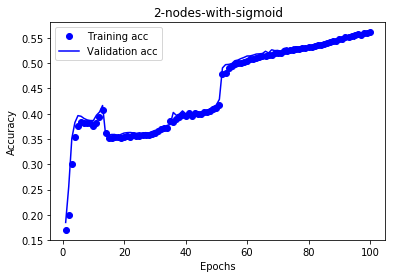

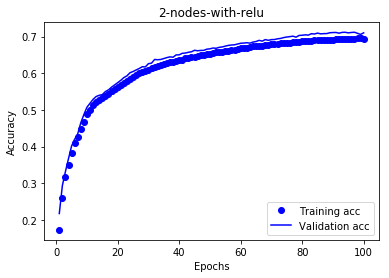

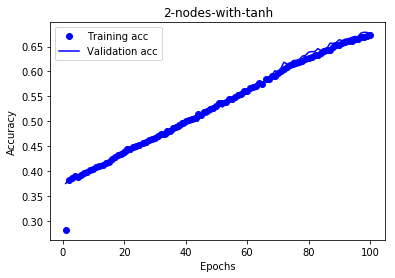

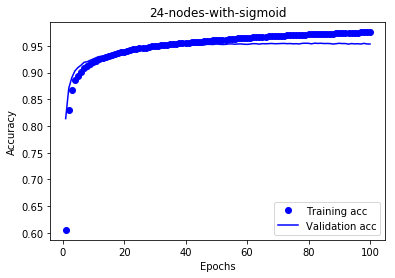

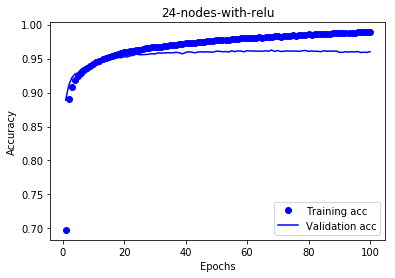

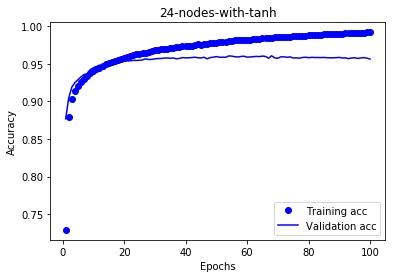

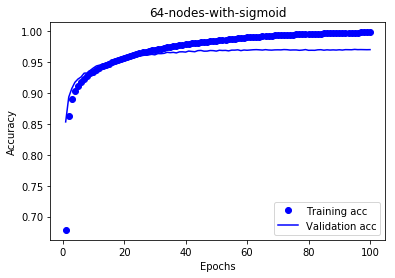

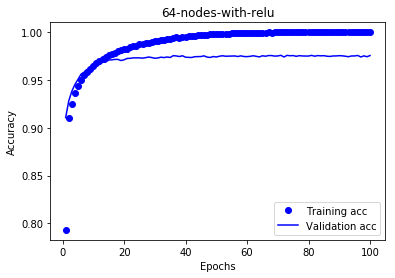

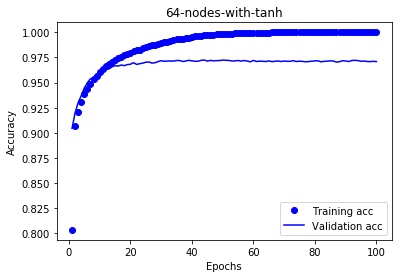

In [15]:
epochs = range(1, 101)

for i in range(9):
    plt.plot(epochs, training_performance_results[i], 'bo', label='Training acc')
    plt.plot(epochs, validation_performance_results[i], 'b', label='Validation acc')
    plt.title(names[i])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

It is shown that as the number of hidden nodes increases, the epoches taken for the model to start to overfit decreases. For example, with there were only 2 hidden nodes with Relu activation function, the model was underfitting. However, when the number of hidden nodes increased to 24, the model started to overfit starting from around 25 epochs. When the hidden nodes was 64, the model started to overfit around 18 epochs. Retrain the models on the entire train set with epochs = 20.

In [16]:
train_accuracy=[]
test_accuracy=[]

In [17]:
for name, node, activation in zip(names, nodes, activations):
    print('\n------------------------------------')
    print('\nProcessing Training Method:', name)
    model = build_model(node, activation)
    model.fit(X_train_scaled, 
              y_train, 
              epochs=20,
             batch_size = 512)
    train_loss, train_acc = model.evaluate(X_train_scaled, y_train)
    test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
                
    index_for_method += 1


------------------------------------

Processing Training Method: 2-nodes-with-sigmoid
Epoch 1/20
60000/60000 [==============================] - 1s 21us/step - loss: 2.2192 - acc: 0.1672
Epoch 2/20
60000/60000 [==============================] - 1s 16us/step - loss: 2.0979 - acc: 0.2994
Epoch 3/20
60000/60000 [==============================] - 1s 16us/step - loss: 2.0165 - acc: 0.3162
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 1.9387 - acc: 0.2947
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 1.8698 - acc: 0.3492
Epoch 6/20
60000/60000 [==============================] - 1s 17us/step - loss: 1.8120 - acc: 0.3822
Epoch 7/20
60000/60000 [==============================] - 1s 17us/step - loss: 1.7628 - acc: 0.3852
Epoch 8/20
60000/60000 [==============================] - 1s 17us/step - loss: 1.7197 - acc: 0.3867
Epoch 9/20
60000/60000 [==============================] - 1s 18us/step - loss: 1.6811 - acc: 0.3884
Epoch 10/20


60000/60000 [==============================] - 1s 17us/step - loss: 0.1386 - acc: 0.9612
Epoch 8/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.1263 - acc: 0.9648
Epoch 9/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.1154 - acc: 0.9677
Epoch 10/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.1064 - acc: 0.9701
Epoch 11/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0990 - acc: 0.9714
Epoch 12/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0926 - acc: 0.9732
Epoch 13/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.0859 - acc: 0.9751
Epoch 14/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0811 - acc: 0.9769
Epoch 15/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0762 - acc: 0.9781
Epoch 16/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0718 - acc: 0.9798
Epoc

Using OrderedDict to preserve the order of variables in DataFrame.

In [18]:
from collections import OrderedDict

In [19]:
results = pd.DataFrame(OrderedDict([('Method Name', names),
                        ('Nodes per Layer', nodes),
                        ('Activation', activations),
                        ('Training Set Accuracy', train_accuracy),
                        ('Test Set Accuracy', test_accuracy)]))

In [20]:
print('\nBenchmark Experiment: Tensorflow Neural Networks with 2x2 Factorial Design\n')
print(results) 


Benchmark Experiment: Tensorflow Neural Networks with 2x2 Factorial Design

             Method Name  Nodes per Layer Activation  Training Set Accuracy  \
0   2-nodes-with-sigmoid                2    sigmoid               0.379483   
1      2-nodes-with-relu                2       relu               0.547850   
2      2-nodes-with-tanh                2       tanh               0.403767   
3  24-nodes-with-sigmoid               24    sigmoid               0.944533   
4     24-nodes-with-relu               24       relu               0.964617   
5     24-nodes-with-tanh               24       tanh               0.961283   
6  64-nodes-with-sigmoid               64    sigmoid               0.964233   
7     64-nodes-with-relu               64       relu               0.985733   
8     64-nodes-with-tanh               64       tanh               0.985467   

   Test Set Accuracy  
0             0.3777  
1             0.5453  
2             0.3945  
3             0.9383  
4             0.9

# After-training Weights Analysis: Hidden Layer to Output Layer

Build the chosed model for after-training weights analysis. 

In [92]:
model = build_model(64, 'relu')
model.fit(X_train_scaled, y_train, epochs=20, batch_size = 512) #The original line of codes for this was accidently deleted. This was rewritten and rerun at a later time.

Epoch 1/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.7439 - acc: 0.7985
Epoch 2/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.3039 - acc: 0.9159
Epoch 3/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.2461 - acc: 0.9315
Epoch 4/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.2093 - acc: 0.9415
Epoch 5/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.1825 - acc: 0.9486
Epoch 6/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.1624 - acc: 0.9539
Epoch 7/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.1475 - acc: 0.9586
Epoch 8/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1350 - acc: 0.9620
Epoch 9/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1242 - acc: 0.9649: 0s - loss: 0.1223 
Epoch 10/20
60000/60000 [==============================] - 1s 19us/step - loss: 

Extract the after-training weights connecting hidden nodes to output nodes. 

In [68]:
weights_o = model.layers[2].get_weights()

In [69]:
len(weights_o) #weights for the output layer and the biases

2

In [74]:
for n in range(64):
    print("----------------------------")
    print("from hidden node {} to output nodes".format(n))
    print(weights_o[0][n])

----------------------------
from hidden node 0 to output nodes
[-0.7086061  -0.39737502  0.33930615  0.3028222   0.30239308  0.4213185
  0.11276266 -0.14611684  0.03824236 -0.05205961]
----------------------------
from hidden node 1 to output nodes
[ 0.45311257 -0.6563722   0.10288373  0.24318795  0.11757012 -0.43676156
  0.23428138 -0.499516   -0.14709169 -0.06302832]
----------------------------
from hidden node 2 to output nodes
[ 0.33997294  0.7406466   0.01953724 -0.4727719  -0.16073294  0.3918957
  0.02456868  0.5968132  -0.83901733 -0.60928196]
----------------------------
from hidden node 3 to output nodes
[ 0.25415233  0.27997038  0.3397279  -0.19239134 -0.4097618   0.10953014
  0.28410992 -0.32050025  0.05860929  0.3028811 ]
----------------------------
from hidden node 4 to output nodes
[-0.39240164  0.6572931  -0.19308326 -0.09675968  0.19892582  0.15790111
  0.0541198   0.80557793 -0.5560584  -0.81820863]
----------------------------
from hidden node 5 to output nodes
[ 0

# Comparison Analysis: After-training Weights from Input Layer to Output Layer for Different Class of Input Data

Devide the test set based on labels. 

In [25]:
X_test_category = []
y_test_category = []
for n in range(10):
    i, = np.where(y_test == n)
    X_test_category.append(X_test_scaled[i,])
    y_test_category.append(y_test[i,])

Plot the first 25 samples of each group to verify the separation was correct.

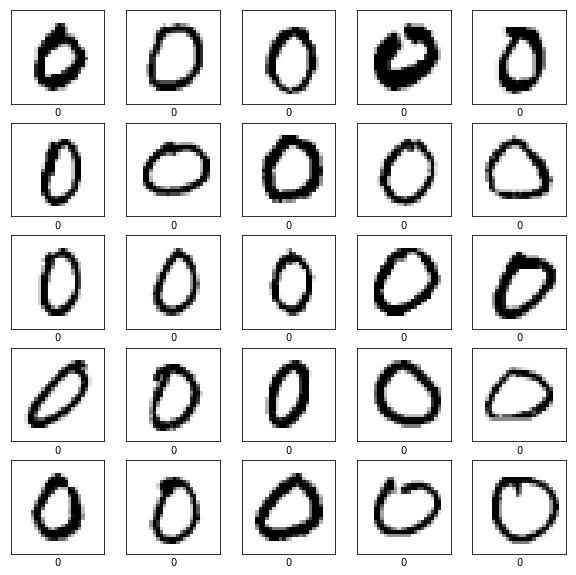

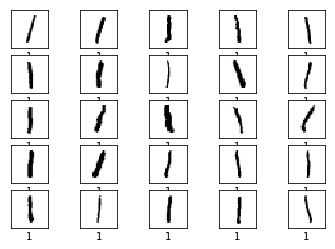

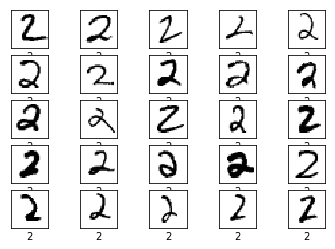

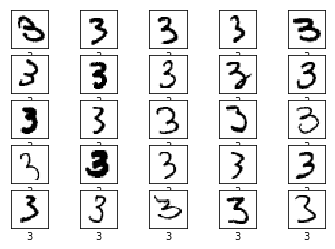

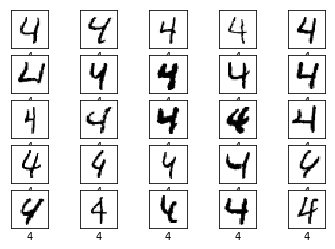

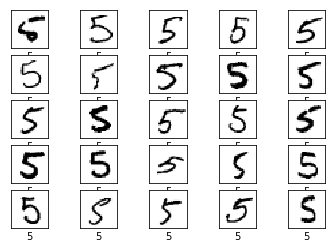

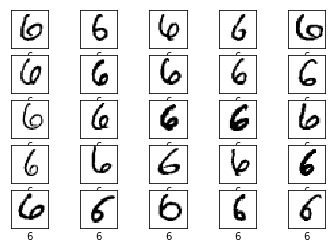

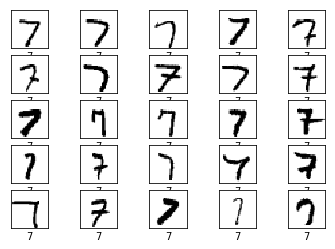

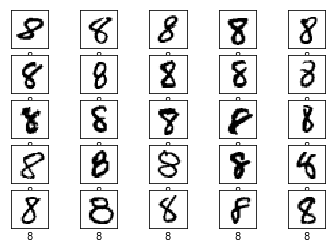

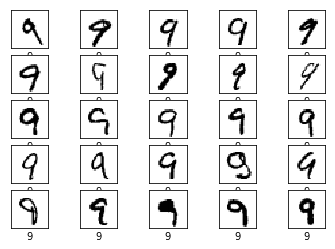

In [27]:
plt.figure(figsize=(10,10))
for n in range(10):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_test_category[n][i], cmap=plt.cm.binary)
        plt.xlabel(y_test_category[n][i])
    plt.show()

Create an empty list and store the first eight (8) extracted weights for each different class of input data in the list.

In [104]:
weights_h_test = []

In [105]:
for i in range(10):
    model_test = build_model(64, 'relu')
    model_test.fit(X_test_category[i], y_test_category[i], epochs=4, batch_size = 512)
    weights_h = model_test.layers[1].get_weights()
    for n in range(8):
        weights_h_test.append(weights_h[0][n])

Epoch 1/4
980/980 [==============================] - 1s 722us/step - loss: 2.5330 - acc: 0.0276
Epoch 2/4
980/980 [==============================] - 0s 16us/step - loss: 1.6063 - acc: 0.6898
Epoch 3/4
980/980 [==============================] - 0s 30us/step - loss: 0.9126 - acc: 0.9969
Epoch 4/4
980/980 [==============================] - 0s 34us/step - loss: 0.4351 - acc: 1.0000
Epoch 1/4
1135/1135 [==============================] - 1s 606us/step - loss: 2.3412 - acc: 0.0273
Epoch 2/4
1135/1135 [==============================] - 0s 45us/step - loss: 1.7892 - acc: 0.7392
Epoch 3/4
1135/1135 [==============================] - 0s 39us/step - loss: 1.2983 - acc: 0.9974
Epoch 4/4
1135/1135 [==============================] - 0s 45us/step - loss: 0.8966 - acc: 1.0000
Epoch 1/4
1032/1032 [==============================] - 1s 676us/step - loss: 2.1571 - acc: 0.2965
Epoch 2/4
1032/1032 [==============================] - 0s 23us/step - loss: 0.8694 - acc: 0.9990
Epoch 3/4
1032/1032 [==============

In [106]:
len(weights_h_test)

80

Focus on hidden node 0 and select only the weights connecting the first (8) input node to hidden node 0 for comparison analysis. 

In [107]:
weights_for_comparison = []
for i in range(80):
    weights_for_comparison.append(weights_h_test[i][0])

In [121]:
weights_for_comparison_reshape = np.reshape(weights_for_comparison, (10, 8))

In [122]:
print(weights_for_comparison_reshape) 

[[-0.04038711  0.02808258 -0.01719964  0.06980113 -0.06678176  0.06280402
  -0.04678813  0.01735628]
 [-0.0071244  -0.0458748  -0.04137224  0.00367817 -0.0763088   0.00597634
  -0.06410499  0.05982656]
 [-0.00750703 -0.01681661 -0.01391298  0.06402148  0.06421184  0.07861524
   0.02086724 -0.01019104]
 [-0.01951224 -0.03372479 -0.0716493  -0.07781784 -0.04950325  0.06086487
  -0.01703049 -0.00426551]
 [-0.0128654  -0.00833643  0.08235598 -0.05823474  0.07455016  0.07156148
  -0.07964534 -0.01552061]
 [-0.08359356 -0.00985881  0.04571626 -0.04761329 -0.05996647  0.06933869
  -0.01224324  0.03237463]
 [-0.02790087  0.02195808 -0.03624478  0.05620975 -0.04734762  0.06611676
   0.05899463 -0.03663035]
 [-0.02373791 -0.07523459 -0.05926798 -0.01311446  0.08391073  0.07933869
  -0.06529959 -0.01290573]
 [ 0.00032455  0.01678029 -0.03939855  0.02944125  0.04929169  0.03111595
   0.04170463 -0.05602945]
 [ 0.03100986  0.05490438  0.02416771 -0.05678115  0.04711027  0.05697697
  -0.07268683 -0.